In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

- проверить согласованность общего рейтинга (Overall) с нормальным распределением 
- проверить гипотезу для однородности рейтинга для французских и итальянских футболистов 
- корреляция рейтинга и национальности?

 `fifa_players_stats.csv`

# TASK 1

In [56]:
df = pd.read_csv('./dataset/fifa_players_stats.csv')
overall = df['Overall'].dropna()
df.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [58]:
mean = overall.mean()
median = overall.median()
std_dev = overall.std()
asym_coef = overall.skew()
kurtosis = overall.kurtosis()
print(f'mean = {mean}\nmedian = {median}\nstandart deviation = {std_dev}\nkurtosis = {kurtosis}')

mean = 65.85204164194401
median = 66.0
standart deviation = 6.788352681607474
kurtosis = 0.15105535992257524


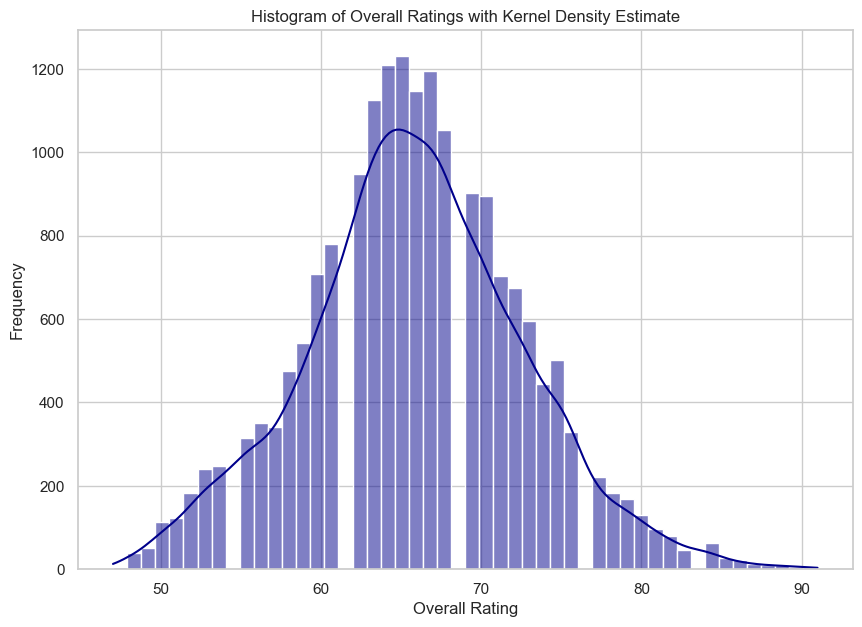

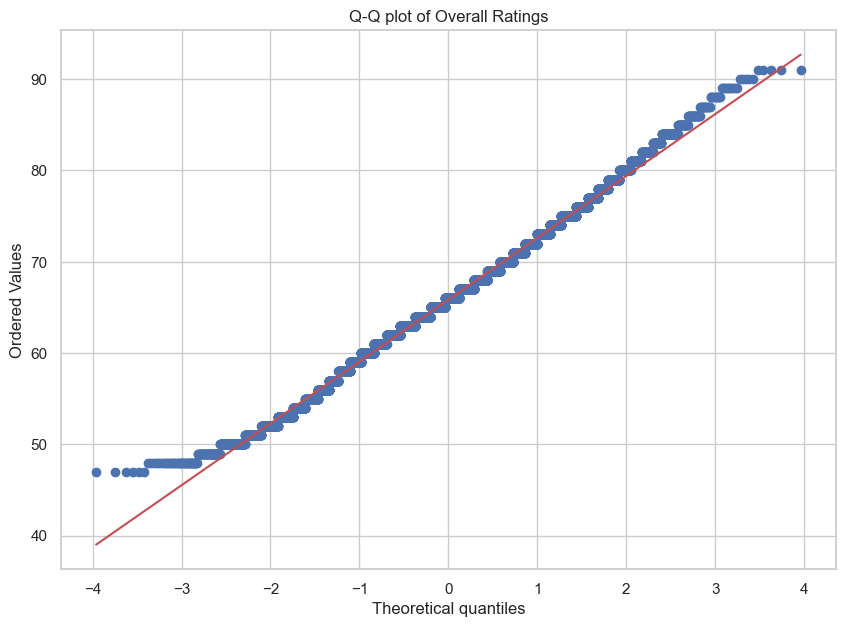

In [86]:
sns.set(style="whitegrid")

# histogram
plt.figure(figsize=(10, 7))
sns.histplot(overall, bins=50, kde=True, color="darkblue")
plt.title('Histogram of Overall Ratings with Kernel Density Estimate')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot 
plt.figure(figsize=(10, 7))
stats.probplot(overall, dist="norm", plot=plt)
plt.title('Q-Q plot of Overall Ratings')
plt.show()


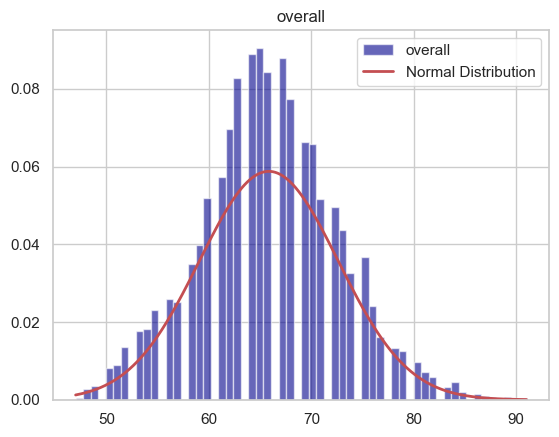

In [137]:
def plot_bins(data, title, std=None):
    plt.hist(data, bins=60, density=True, alpha=0.6, label=title, color="darkblue")
    x = np.linspace(min(data), max(data), 10000)
    if std != None:
        plt.plot(x, stats.norm.pdf(x, data.mean(), std), 'r-', lw=2, label='Normal Distribution')
    plt.title(title)
    plt.legend()
    plt.show()

plot_bins(overall, "overall", overall.std())

In [90]:
# Shapiro-Wilk test
shapiro_test = stats.shapiro(overall)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

if shapiro_test[1] < 0.05:
    print("p-value < 0.05 -> reject H_0")
else:
    print("p-value > 0.05 -> not reject H_0")

Shapiro-Wilk test statistic: 0.9953457609466487, p-value: 1.0692536117768409e-23
p-value < 0.05 -> reject H_0


/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18539.
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
stats.normaltest(overall)

NormaltestResult(statistic=49.48716560986023, pvalue=1.7947275326164748e-11)

In [60]:
stats.shapiro(overall)

/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18539.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9953457609466487, pvalue=1.0692536117768409e-23)

In [88]:
stats.jarque_bera(overall)

SignificanceResult(statistic=51.76288176314877, pvalue=5.752187598415661e-12)

# TASK 2

In [94]:
french = df[df['Nationality'] == 'France']['Overall']
italian = df[df['Nationality'] == 'Italy']['Overall']

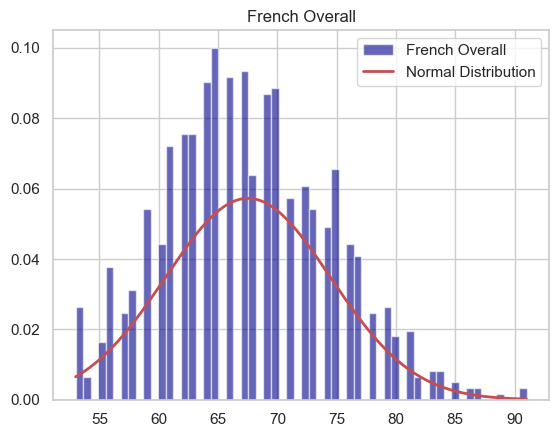

In [102]:
plot_bins(french, "French Overall", french.std())

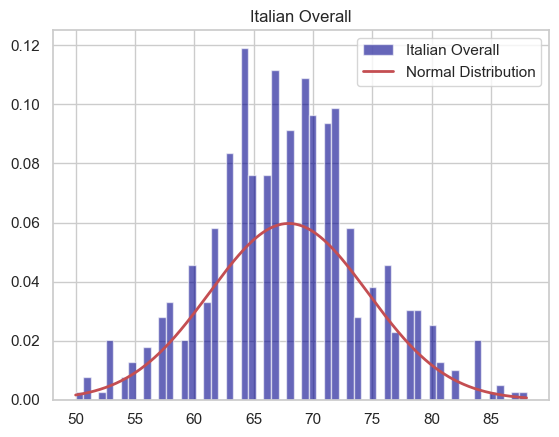

In [103]:
plot_bins(italian, "Italian Overall", italian.std())

In [92]:
# Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(french, italian)

print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")

if p_value < 0.05:
    print("p-value > 0.05 -> reject H_0")
else:
    print("p-value > 0.05 -> not reject H_0")


KS Statistic: 0.0647771727263484, p-value: 0.07909583704313243
p-value > 0.05 -> not reject H_0


In [115]:
anderson_ksamps = []
ks_2samps = []

for i in range(1000):
    s1 = french.sample(100)
    s2 = italian.sample(100)
    anderson_ksamps.append(stats.anderson_ksamp([s1, s2]).pvalue)
    ks_2samps.append(stats.ks_2samp(s1, s2).pvalue)
    
anderson_ksamps = np.array(anderson_ksamps)
ks_2samps = np.array(ks_2samps)

/var/folders/_y/jcd_xp250v7bfjmlmbh8fsfr0000gp/T/ipykernel_50455/970344352.py:7: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson_ksamps.append(stats.anderson_ksamp([s1, s2]).pvalue)
/var/folders/_y/jcd_xp250v7bfjmlmbh8fsfr0000gp/T/ipykernel_50455/970344352.py:7: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson_ksamps.append(stats.anderson_ksamp([s1, s2]).pvalue)


# TASK 3

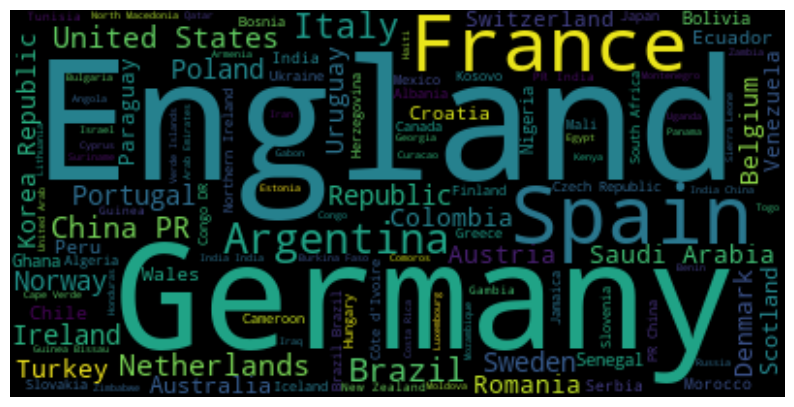

In [125]:
from wordcloud import WordCloud
nationality_name = " ".join(n for n in df['Nationality'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [129]:
nationalities = df['Nationality'].unique()
nationality_name = df["Nationality"]

In [108]:
h_statistic, p_value_kruskal = stats.kruskal(*(df[df['Nationality'] == nat]['Overall'] for nat in nationalities))
h_statistic, p_value_kruskal

(3989.249084488498, 0.0)

In [111]:
sel_size = 500

nationalities = [nat for nat in nationalities if sel_size < len(df[df['Nationality'] == nat])]

wilcoxons = []
for i in range(len(nationalities) - 1):
    for j in range(i + 1, len(nationalities)):
        for _ in range(10):
            s1 = df[df['Nationality'] == nationalities[i]]['Overall'].sample(sel_size)
            s2 = df[df['Nationality'] == nationalities[j]]['Overall'].sample(sel_size)
            wilcoxons.append(stats.wilcoxon(s1, s2)[1])
        
np.array(wilcoxons).mean()

0.0004560552899574823

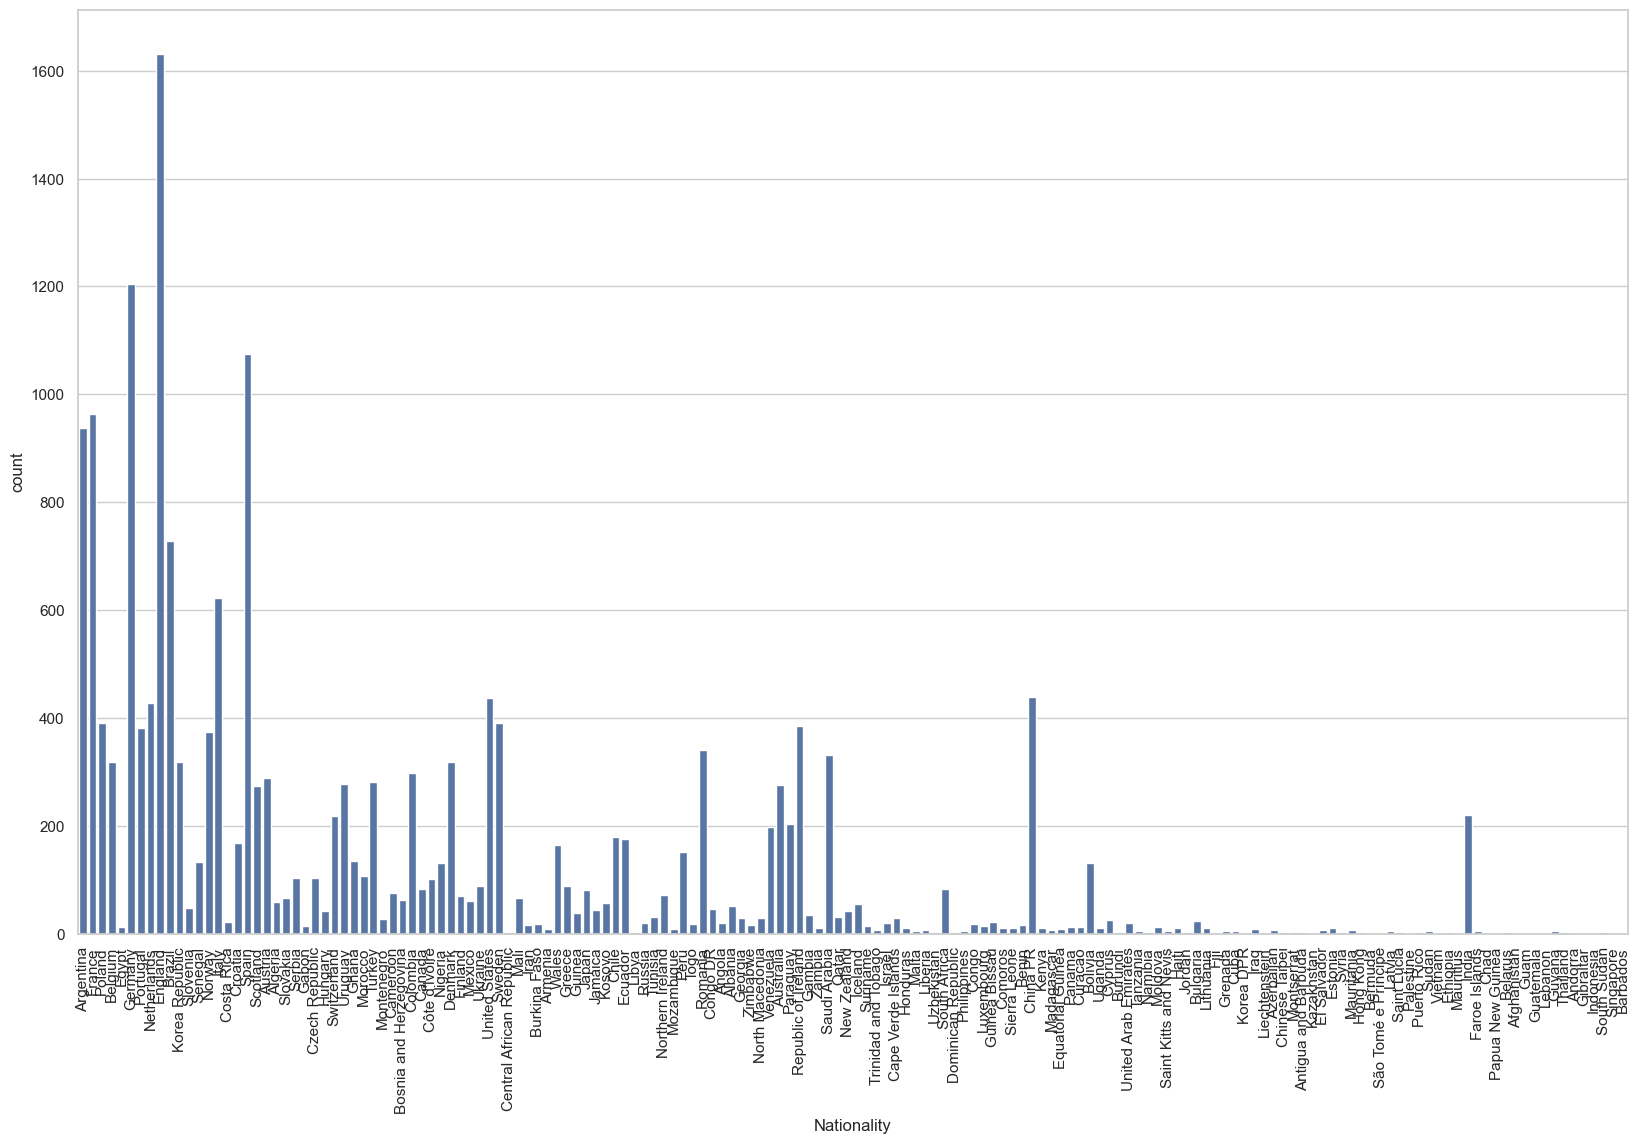

In [130]:
plt.figure(figsize=(20,12))
sns.countplot(x = nationality_name)
plt.xticks(rotation=90)
plt.show()

/var/folders/_y/jcd_xp250v7bfjmlmbh8fsfr0000gp/T/ipykernel_50455/1935950762.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')


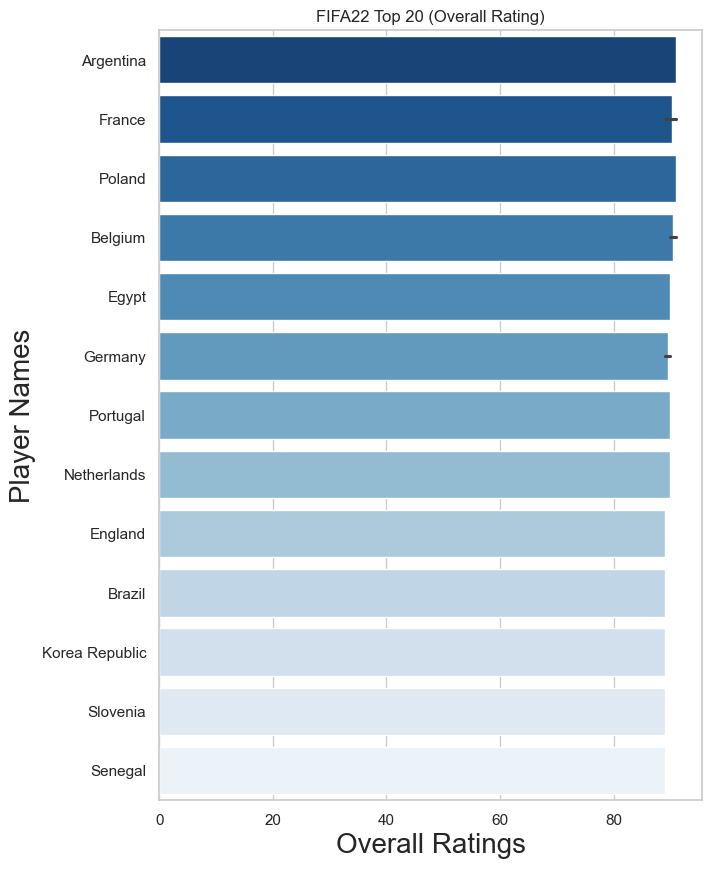

In [136]:
data = pd.DataFrame({'short_name': nationality_name,'overall':overall})

x = nationality_name.head(20) 
y = overall.head(20)

# plot
plt.figure(figsize=(7,10))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 20) 
plt.ylabel('Player Names', size = 20 ) 
plt.title('FIFA22 Top 20 (Overall Rating)')

plt.show()

In [132]:
top20 = df.sort_values(by = "Overall",ascending=False).head(20)
top20

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Rating Bin
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,88,91,67,66,67,62,53,62,22,91-100
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,83,86,67,69,67,64,63,64,22,91-100
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,82,82,82,78,72,78,24,91-100
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,84,92,70,66,70,66,57,66,21,91-100
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,84,89,67,67,67,63,58,63,21,91-100
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,85,90,74,71,74,70,61,70,25,81-90
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,35,34,32,34,32,32,32,32,90,81-90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,53,47,39,46,39,38,37,38,90,81-90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,81,87,65,62,65,61,56,61,23,81-90
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,79,73,83,88,83,85,90,85,23,81-90


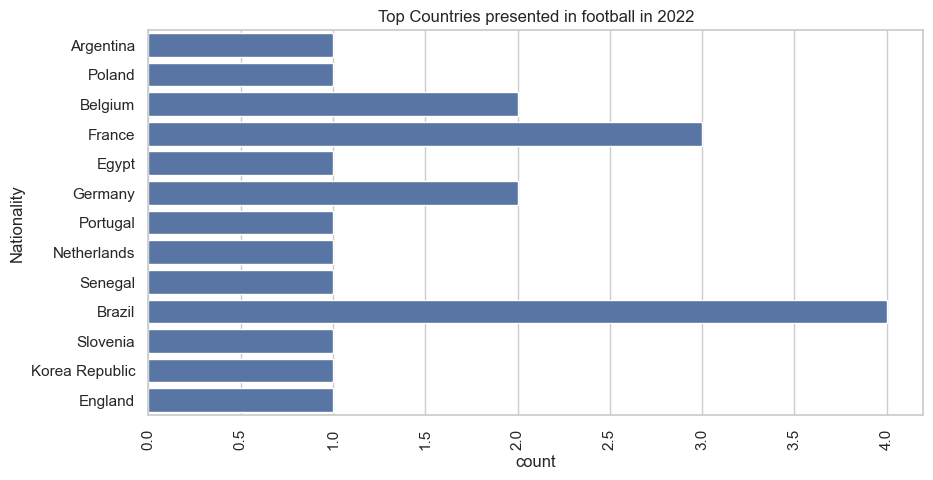

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(top20['Nationality'])
plt.xticks(rotation=90)
plt.title('Top Countries presented in football in 2022')
plt.show()